#**Machine Learning: Clasificacion con SKLearn**

en este notebook se desarollaran proyectos de aprendizaje con machine learning

In [25]:
#importando librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#Aula 1: Introduccion a la clasificacion

In [26]:
#features 1 = si y 0 = no
#tiene el pelo largo?
#tiene las uñas afiladas?
#hace miau?

perro1=[0,1,1]
perro2=[1,0,1]
perro3=[1,1,1]

gato1=[0,1,0]
gato2=[0,1,1]
gato3=[1,1,0]

x_train= [perro1, perro2, perro3, gato1, gato2, gato3]
y_train =[1,1,1,0,0,0]

In [27]:
#importando linearSVC
from sklearn.svm import LinearSVC

In [28]:
#creando modelo
model = LinearSVC()

In [29]:
#introducciendo datos a modelo
model.fit(x_train,y_train)

LinearSVC()

In [30]:
#introducciendo animal misterioso y haciendo comparativa para ver si esta
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [31]:
#creando mas animales misteriosos
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]
#creando lista pruebas
x_test = [misterio1, misterio2, misterio3]
#clases reales de animales
y_test = [0,1,1]

In [32]:
#alamcenando predict en variable
previsiones = model.predict(x_test)

In [33]:
correctos = (previsiones == y_test).sum()
#total va ser la cantidad de pruebas disponibles
total = len(x_test)
tasa_de_acierto = correctos/total
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')


La tasa de aciertos fue de: 33.33%


In [34]:
#herramienta para obtener la metrica mas facil
from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de aciertos fue de: 33.33%


In [35]:
#x = atributo
#y = target o clasificacion

#Aula 2: Pruebas replicables, estratificacioj, lectura de datos de internet

In [36]:
#importando uri y crando dataFrame
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)

In [37]:
#tomando ejemplo de datos
datos.sample(5)

,home,how_it_works,contact,bought
20,0,0,1,0
2,1,1,0,0
15,0,0,1,0
22,0,0,1,0
57,1,1,0,0


In [38]:
#llamdo columnas de dataframe para crear un diccionario
datos.columns

Index(['home', 'how_it_works', 'contact', 'bought'], dtype='object')

In [39]:
#crando diccionario para traduccir dataframe
mapa = {
   'home' : 'Principal',
   'how_it_works' : 'Como_funciona',
   'contact' : 'Contacto',
   'bought' : 'Compro'
}
#rename a columnas
datos = datos.rename(columns=mapa)
datos.sample(5)

,Principal,Como_funciona,Contacto,Compro
57,1,1,0,0
37,0,0,1,0
79,1,1,0,1
76,0,0,1,0
81,0,0,1,0


In [40]:
#creando x
x = datos[['Principal','Como_funciona', 'Contacto']]
x.head()

,Principal,Como_funciona,Contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [41]:
#crando y
y = datos.Compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Compro, dtype: int64

In [42]:
#tomando dimension del dataframe
datos.shape

(99, 4)

In [43]:
#tomando los 75 valores primeros registros para el entrenamiento
x_train = x[:75]
y_train = y[:75] #75 para abajo
x_test = x[75:] #75 en adelante
y_test = y[75:]

In [44]:
y_train.value_counts()

0    48
1    27
Name: Compro, dtype: int64

In [45]:
24/75

0.32

In [46]:
y_test.value_counts()

0    18
1     6
Name: Compro, dtype: int64

In [47]:
9/24

0.375

In [48]:
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')

Entrenaremos con 75 elementos y probaremos con 24 elementos.


In [49]:
#importando nuevamente librerias necesarias
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [50]:
#alamcenando predict en variable
previsiones = model.predict(x_test)
#creando model
model = LinearSVC()
model.fit(x_train,y_train)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de aciertos fue de: 54.17%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [51]:
from sklearn.model_selection import train_test_split
#realizando segmentacion
SEED=42
#se setea el estado de aleatoridad con random_state
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=SEED)

previsiones = model.predict(x_test)

model = LinearSVC()
model.fit(x_train,y_train)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de aciertos fue de: 96.0%


In [52]:
from sklearn.model_selection import train_test_split
#realizando segmentacion
SEED=42
#se setea el estado de aleatoridad con random_state
#estratificamos mediante y para que tengamos una estratificacion medida
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=SEED, stratify=y)

previsiones = model.predict(x_test)

model = LinearSVC()
model.fit(x_train,y_train)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de aciertos fue de: 96.0%


In [53]:
y_train.value_counts()

0    49
1    25
Name: Compro, dtype: int64

In [54]:
25/74

0.33783783783783783

In [55]:
y_test.value_counts()

0    17
1     8
Name: Compro, dtype: int64

In [56]:
8/25

0.32

In [57]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#Aula 3: Proyectos de baja dimensionalidad y baseline


In [58]:
url = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

In [59]:
datos_web = pd.read_csv(url)
datos_web.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [60]:
datos_web.columns

Index(['unfinished', 'expected_hours', 'price'], dtype='object')

In [61]:
mapa = {
    'unfinished' : 'no_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'precio'
}

datos_web = datos_web.rename(columns=mapa)
datos_web.sample(5)

,no_finalizado,horas_esperadas,precio
1811,0,92,15707
1015,0,37,414
1255,0,90,15314
511,1,15,139
1068,0,35,395


In [62]:
#aregando cambio en no finalizado
cambio = {1:0, 0:1}
datos_web['finalizado'] = datos_web.no_finalizado.map(cambio)

datos_web.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
2145,1,2,207,0
536,1,22,159,0
192,1,70,2889,0
1784,0,99,20072,1
997,1,73,3919,0


<Axes: xlabel='horas_esperadas', ylabel='precio'>

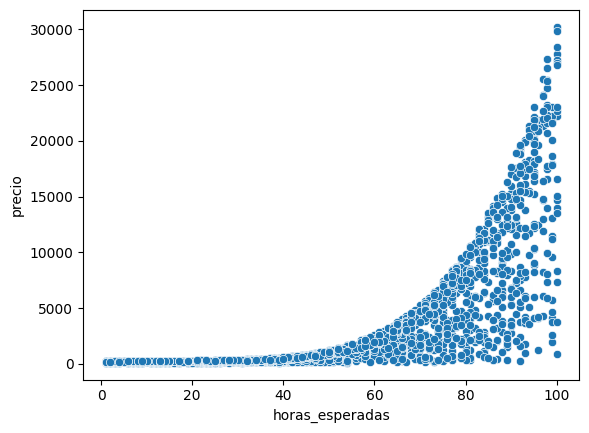

In [63]:
#graficando con seaborn, grafico de dispersion

sns.scatterplot(x='horas_esperadas', y='precio', data=datos_web)

<Axes: xlabel='horas_esperadas', ylabel='precio'>

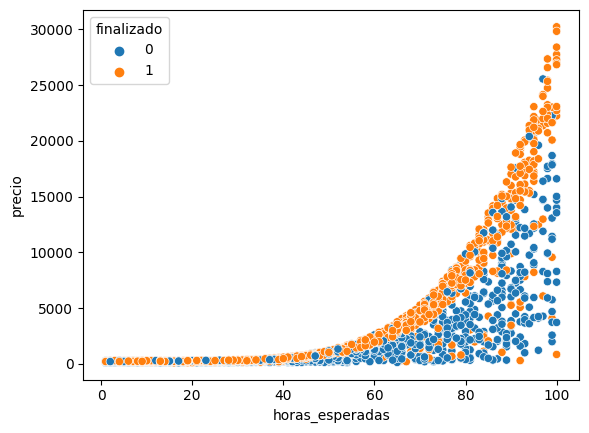

In [64]:
#con finalizado
sns.scatterplot(x='horas_esperadas', y='precio', data=datos_web, hue='finalizado')

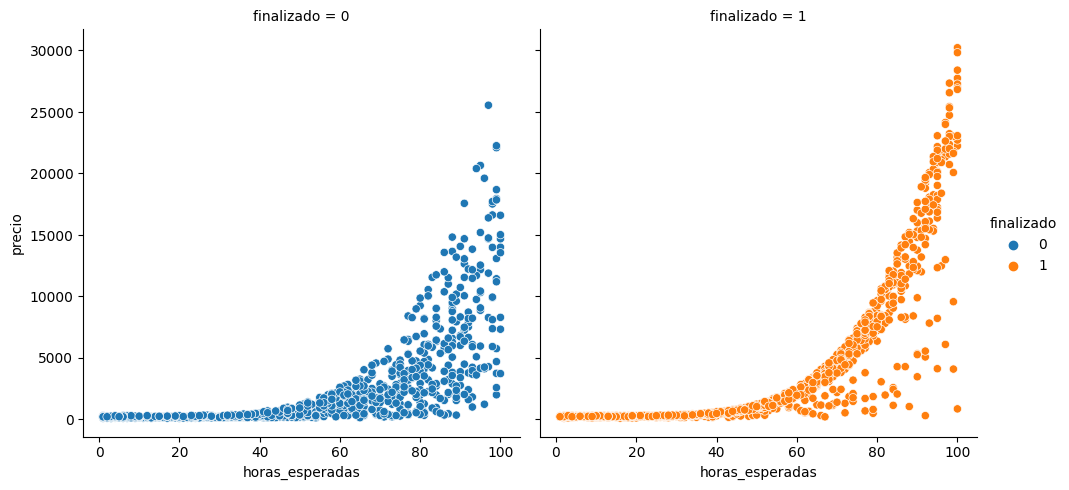

In [65]:
#otra forma de graficar con plot y separando col
sns.relplot(x='horas_esperadas', y='precio', data=datos_web, hue='finalizado', col='finalizado')

In [66]:
#establecer estado con numpy
import numpy as np
from sklearn.model_selection import train_test_split

In [97]:
x= datos_web[['horas_esperadas','precio']]
y= datos_web.finalizado
#establecer estado con numpy
SEED = 43
np.random.seed(SEED)

#realizando segmentacion
#se setea el estado de aleatoridad con random_state
#estratificamos mediante eje Y para que tengamos una estratificacion medida

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y)

print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')


model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de aciertos fue de: 49.26%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [98]:
#establecer base main
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de aciertos fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

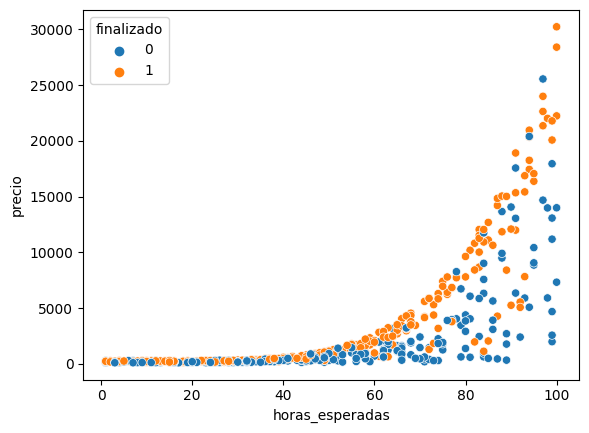

In [99]:
#graficar puntos posibles
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test )

In [100]:
#crear valores de X y Y
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [101]:
#tomando pixeles de area y creando ejes
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [102]:
#ravel convierte un array bi-dimensional o multidimencional y lo tansforma en un floyter array, en pocas palabras transforma de matrix a vector
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [103]:
Z = model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [104]:
#adaptamos Z
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

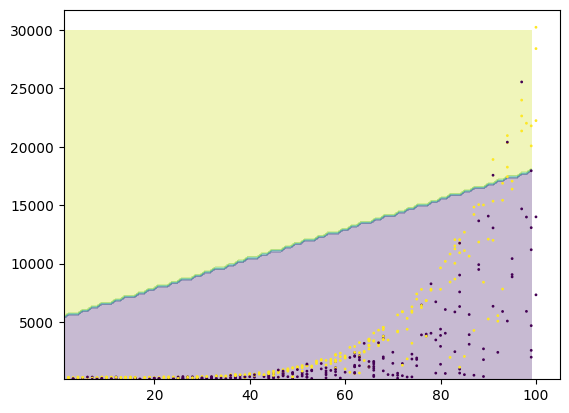

In [105]:
#graficando contorno para ver la linea de separacion
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)

#Aula 4: Support Vector Machines y sistemas no lineales

Entrenaremos con 1617 elementos y probaremos con 540 elementos.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


La tasa de aciertos fue de: 55.56%


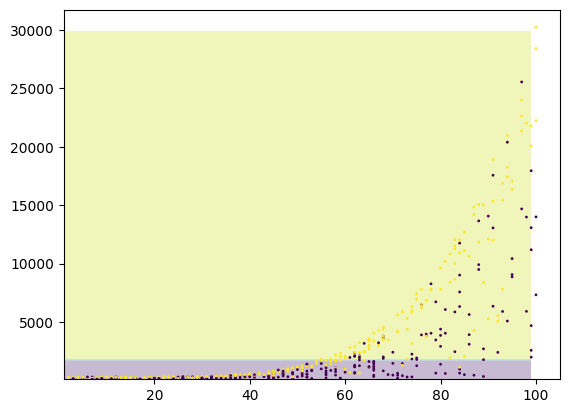

In [108]:
from sklearn.svm import SVC

x= datos_web[['horas_esperadas','precio']]
y= datos_web.finalizado
#establecer estado con numpy
SEED = 43
np.random.seed(SEED)

#realizando segmentacion
#se setea el estado de aleatoridad con random_state
#estratificamos mediante eje Y para que tengamos una estratificacion medida

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y)

print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')


model = SVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

Z = model.predict(puntos)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)


tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de aciertos fue de: 67.41%


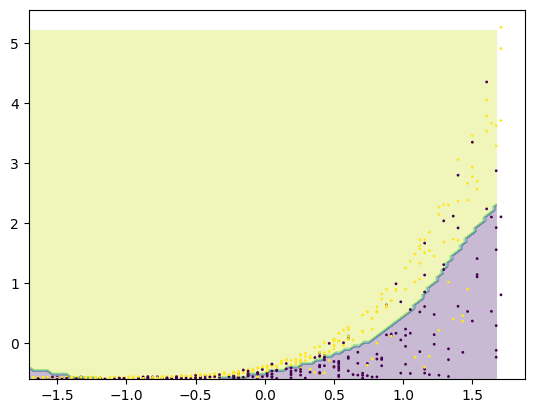

In [112]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


x= datos_web[['horas_esperadas','precio']]
y= datos_web.finalizado
#establecer estado con numpy
SEED = 43
np.random.seed(SEED)

#realizando segmentacion
#se setea el estado de aleatoridad con random_state
#estratificamos mediante eje Y para que tengamos una estratificacion medida

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y)

print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')


scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

#conviertiendo de pandas a numpy

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

Z = model.predict(puntos)
Z = Z.reshape(xx.shape)
Z
#aca se altera tambien
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)


tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

In [113]:
#se usa estimador y se estandarizan datos
#unicos casos donde no se usa es en los arboles de desicion

#Aula 5: Dummy classifiers y arboles de decision.

In [115]:
url = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos_carros = pd.read_csv(url)
datos_carros.head(5)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [117]:
datos_carros.columns

Index(['Unnamed: 0', 'mileage_per_year', 'model_year', 'price', 'sold'], dtype='object')

In [120]:
#creando diccionario
mapa = {
    'mileage_per_year' : 'millas_por_aho',
    'model_year' : 'aho_modelo',
    'price' : 'precio',
    'sold' : 'vendido'
}
#mapeando
datos_carros = datos_carros.rename(columns=mapa)
datos_carros.sample(3)

,Unnamed: 0,millas_por_aho,aho_modelo,precio,vendido
1644,1644,15327,2013,110902.33,yes
5819,5819,7003,2005,89173.50,no
9350,9350,17789,2000,41146.42,yes


In [122]:
#camnbiando no por 0 y si por 1
cambio = {'no':0, 'yes': 1}
datos_carros.vendido = datos_carros.vendido.map(cambio)
datos_carros.head()

,Unnamed: 0,millas_por_aho,aho_modelo,precio,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [129]:
#cambiando año de modelo a edad por año
from datetime import datetime
aho_actual = datetime.today().year
datos_carros['edad_del_modelo'] = aho_actual - datos_carros.aho_modelo
datos_carros.sample(5)

,Unnamed: 0,millas_por_aho,aho_modelo,precio,vendido,edad_del_modelo
8279,8279,16251,2008,61722.12,0,15
436,436,19972,2014,95755.37,0,9
8123,8123,16784,2001,40276.27,1,22
6692,6692,14589,2007,102921.08,0,16
3830,3830,17645,2015,66048.21,0,8


In [130]:
#cambian millas por kilometros
datos_carros['km_por_aho'] = datos_carros.millas_por_aho * 1.60934
datos_carros.sample(5)

,Unnamed: 0,millas_por_aho,aho_modelo,precio,vendido,edad_del_modelo,km_por_aho
9348,9348,13115,2010,56821.95,1,13,21106.49410
6253,6253,11996,2001,66758.07,1,22,19305.64264
4763,4763,11028,2004,49828.08,1,19,17747.80152
4392,4392,7628,2000,69327.52,0,23,12276.04552
9594,9594,10652,2005,74377.05,1,18,17142.68968


In [134]:
#eliminando columnas inncesarias
datos_carros = datos_carros.drop(columns=['Unnamed: 0', 'millas_por_aho', 'aho_modelo'], axis=1)
datos_carros.sample(5)

,precio,vendido,edad_del_modelo,km_por_aho
8126,84477.50,0,11,29206.30232
1710,60092.78,0,17,20552.88114
7662,53568.30,1,13,24985.00350
7219,45588.28,1,19,25929.68608
7634,49322.32,1,19,17799.30040


In [138]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


x= datos_carros[['edad_del_modelo','km_por_aho','precio']]
y= datos_carros.vendido
#establecer estado con numpy
SEED = 44
np.random.seed(SEED)

#realizando segmentacion
#se setea el estado de aleatoridad con random_state
#estratificamos mediante eje Y para que tengamos una estratificacion medida

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y)
print(f'Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.')


scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de aciertos fue de: 76.92%


In [140]:
#usando DummyClassifier para saber si la tasa de acierto es buena o no, mediante una classline no excata
#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier

In [144]:
#instanciamos
dummy = DummyClassifier(strategy='stratified')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 51.28%


In [146]:
#Cambiando de estrategia
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


In [150]:
#mejorando resultado y exactitud mediante arboles de decision
#https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


x= datos_carros[['edad_del_modelo','km_por_aho','precio']]
y= datos_carros.vendido
#establecer estado con numpy
SEED = 44
np.random.seed(SEED)

#realizando segmentacion
#se setea el estado de aleatoridad con random_state
#estratificamos mediante eje Y para que tengamos una estratificacion medida

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y)
print(f'Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.')


scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

#aca se cambia
#agregando mx_depth que define la profundidad
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de aciertos fue de: 78.76%


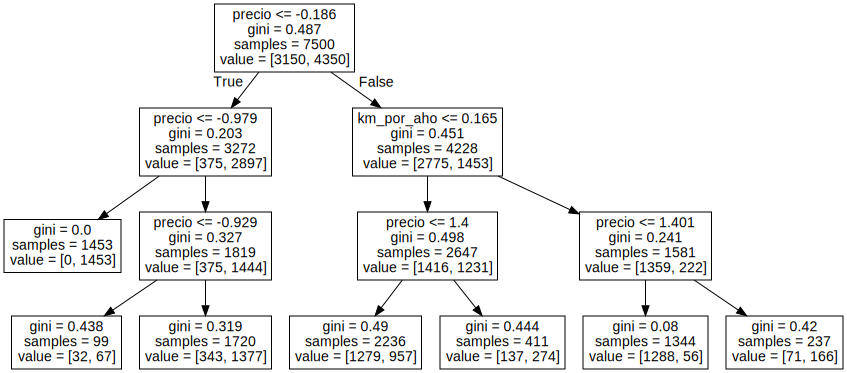

In [151]:
#formando arbol de desiciom
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names= features)
grafico = graphviz.Source(dot_data)

grafico

In [154]:
#ahora sin escalar o estandarizar
#mejorando resultado y exactitud mediante arboles de decision
#https://scikit-learn.org/stable/modules/tree.html

x= datos_carros[['edad_del_modelo','km_por_aho','precio']]
y= datos_carros.vendido
#establecer estado con numpy
SEED = 44
np.random.seed(SEED)

#realizando segmentacion
#se setea el estado de aleatoridad con random_state
#estratificamos mediante eje Y para que tengamos una estratificacion medida

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, stratify=y)
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')



#aca se cambia
#agregando mx_depth que define la profundidad
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de aciertos fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de aciertos fue de: 78.76%


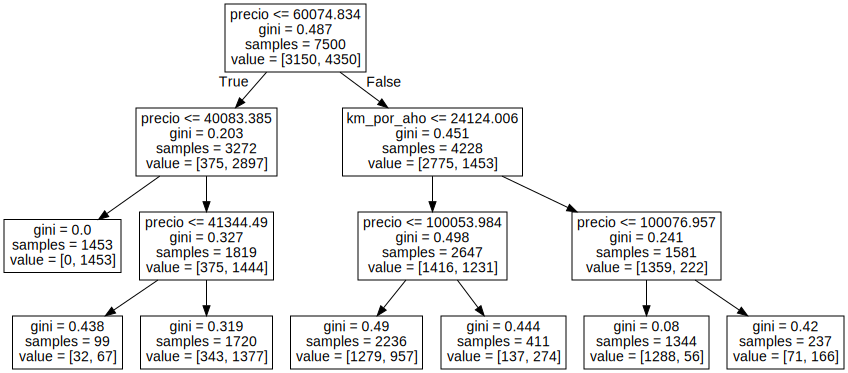

In [153]:
#formando arbol de desiciom
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names= features)
grafico = graphviz.Source(dot_data)

grafico

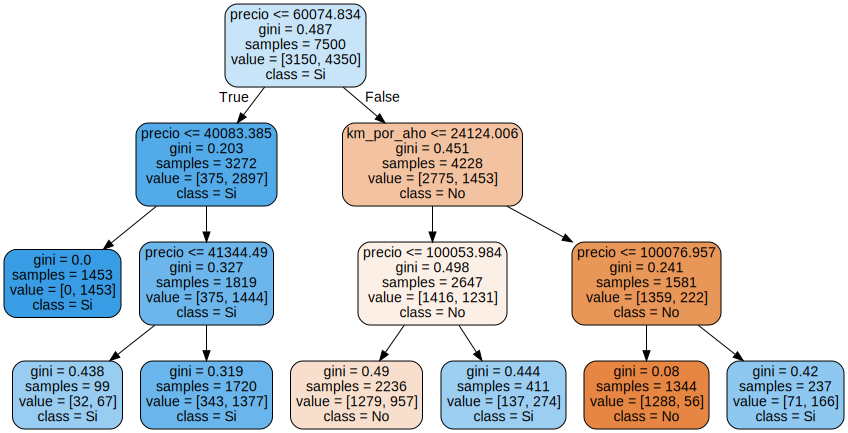

In [155]:
#mejorando arbol de desciones con colores y relleno

features = x.columns
dot_data = export_graphviz(model, feature_names= features, filled=True, rounded=True, class_names=['No', 'Si'])
grafico = graphviz.Source(dot_data)

grafico